In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [44]:
df = pd.read_csv('test.out',sep='\t')
df_gff = pd.read_pickle('/ref/analysis/pipelines/pandas_df/Athaliana_167_TAIR10.gene.gff3.pandas.df.pk')

In [46]:
df_gff.head()

0             1               2     3     4  5  \
genename         longest                                                      
NaN              NaN      Chr1  phytozomev10            gene  3631  5899  .   
AT1G01010.TAIR10 1        Chr1  phytozomev10            mRNA  3631  5899  .   
                 1        Chr1  phytozomev10  five_prime_UTR  3631  3759  .   
                 1        Chr1  phytozomev10             CDS  3760  3913  .   
                 1        Chr1  phytozomev10             CDS  3996  4276  .   

                          6  7  \
genename         longest         
NaN              NaN      +  .   
AT1G01010.TAIR10 1        +  .   
                 1        +  .   
                 1        +  0   
                 1        +  2   

                                                                          8  \
genename         longest                                                      
NaN              NaN                     ID=AT1G01010.TAIR10;Name=AT1G01010   
AT1G01010.TAIR10 1        ID=AT1G01010.1.TAIR10;Name=AT1G01010.1;pacid=1...   
                 1        ID=AT1G01010.1.TAIR10.five_prime_UTR.1;Parent=...   
                 1        ID=AT1G01010.1.TAIR10.CDS.1;Parent=AT1G01010.1...   
                 1        ID=AT1G01010.1.TAIR10.CDS.2;Parent=AT1G01010.1...   

                              transcriptname  
genename         longest                      
NaN              NaN                    None  
AT1G01010.TAIR10 1        AT1G01010.1.TAIR10  
                 1        AT1G01010.1.TAIR10  
                 1        AT1G01010.1.TAIR10  
                 1        AT1G01010.1.TAIR10

In [37]:
loc = np.min(df_gff.loc[genename,'1'][[3,4]].values)

NameError: name 'genename' is not defined

In [47]:
df['loc'] = df['genename'].apply(lambda x : np.min(df_gff.loc[x,'1'][[3,4]].values))
df['chr'] = df['genename'].apply(lambda x: df_gff.loc[x,'1'][0].values[0])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app


In [118]:
df['PhytoHor_set'] = df['genename'].apply(lambda x : x.split('.')[0] in phyto_genelist)

In [154]:
df['PHO'] = df['genename'].apply(lambda x : x.split('.')[0] in pho_genelist)

In [155]:
df['AHD'] = df['genename'].apply(lambda x : x.split('.')[0] in ahd_genelist)

In [145]:
df.to_csv('tajimaD.out.allgenes.txt',sep='\t')

In [126]:
mask = (df['PhytoHor_set'] == True)
TD_PH = df[mask]['TajimaD'].dropna().values

In [156]:
mask = (df['PHO'] == True)
PHO = df[mask]['TajimaD'].dropna().values

mask = (df['AHD'] == True)
AHD = df[mask]['TajimaD'].dropna().values


In [54]:
set(df['chr'])

{'Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5', 'ChrC', 'ChrM'}

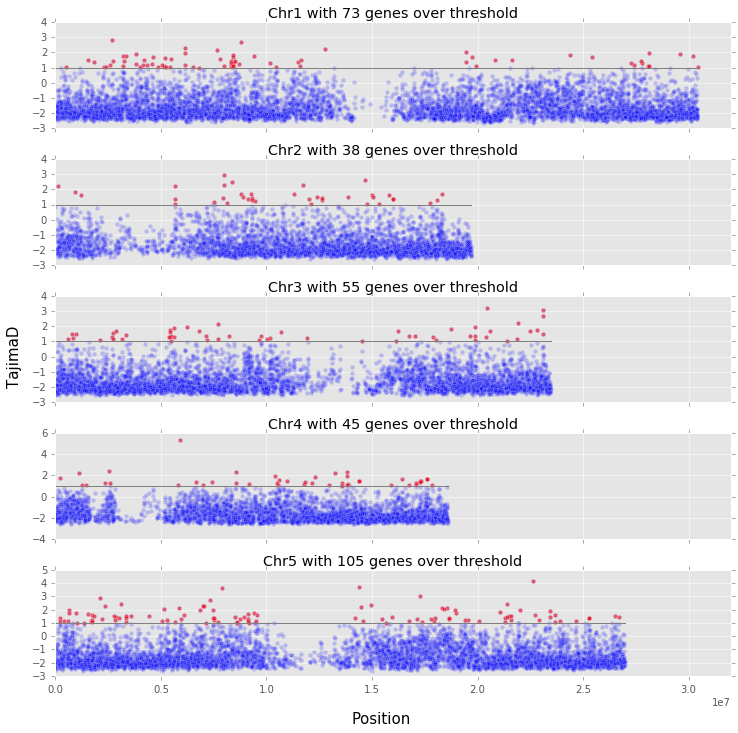

In [96]:
fig, ax = plt.subplots(5,figsize=(10,10),sharex=True)

for n, chromosome in enumerate(['Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5']):
    mask = (df['chr'] == chromosome)
    y = df[mask]['TajimaD']
    x = df[mask]['loc']
    ax[n].scatter(x,y,c='b',alpha=0.2)
    m = (y>1)
    y1 = y[m]
    x1 = x[m]
    ax[n].scatter(x1,y1,c='r',alpha=0.5)
    ax[n].plot([0,max(x)],[1,1],c='gray')
    ax[n].set_title("%s with %d genes over threshold"%(chromosome,len(y1)))
    ax[n].set_xlim(-10000,32000000)
    
fig.text(0.5, -0.01, 'Position', ha='center',fontsize=15)
fig.text(-0.02, 0.5, 'TajimaD', va='center', rotation='vertical',fontsize=15)
#plt.xlim(xmin=-1000)
plt.tight_layout()

In [24]:
TajimaD = df['TajimaD']

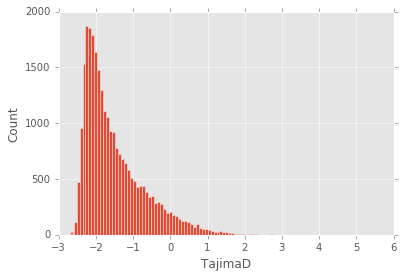

In [97]:
plt.hist(TajimaD.dropna(),bins=100)
plt.ylabel('Count')
plt.xlabel('TajimaD')

In [98]:
# vcftools bin based tajimaD
file_vcftools_tj = '/ref/analysis/ATH1000/ATH1000.Tajima.D'
df_vt_tj = pd.read_csv(file_vcftools_tj,sep='\t')

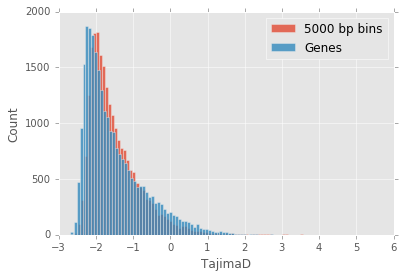

In [106]:
plt.hist(df_vt_tj['TajimaD'].dropna(),bins=100,alpha=0.8,label='5000 bp bins')
plt.hist(TajimaD.dropna(),bins=100,alpha=0.8,label='Genes')
plt.ylabel('Count')
plt.xlabel('TajimaD')
plt.legend()

In [107]:
# Phytohormone gene set TajimaD distribution
df_phyto = pd.read_csv('PvP_PvA.Uniq_interaction.txt',sep='\t')

In [109]:
phyto_genelist = set(list(df_phyto['IntA'].values) + list(df_phyto['IntB'].values))

In [148]:
pho_genelist = [x.strip().upper() for x in open('PHO.txt').readlines()]

In [153]:
ahd_genelist = [x.strip().upper() for x in open('AHD_onlywith_ATgenename.txt').readlines()]

In [158]:
len(ahd_genelist)

618

In [151]:
len(pho_genelist)

1254

In [110]:
def mem(A):
    return A in phyto_genelist

In [112]:
mem('AT1G04250')

True

In [114]:
v_mem = np.vectorize(mem)

In [116]:
v_mem(['AT1G04250','AT4G37260','B'])

array([ True,  True, False], dtype=bool)

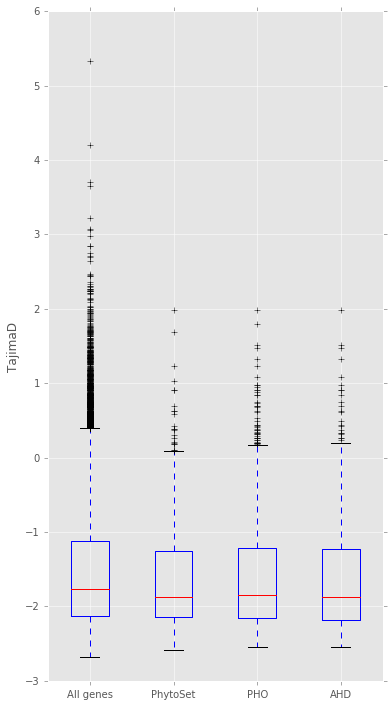

In [159]:
#plt.scatter([1]*len(df['TajimaD'].dropna()),df['TajimaD'].dropna())
fig,ax = plt.subplots(1,figsize=(6,12))
ax.boxplot([df['TajimaD'].dropna(),TD_PH,PHO,AHD])
ax.set_ylabel('TajimaD')
ax.set_xticklabels(['All genes','PhytoSet','PHO','AHD'])

(array([  2.,   3.,   9.,  20.,  16.,  20.,  20.,  24.,  26.,  30.,  36.,
         22.,  29.,  31.,  29.,  20.,  23.,  11.,  21.,  14.,  17.,  15.,
          7.,   9.,   6.,   7.,   8.,  15.,   8.,   5.,   5.,  11.,  13.,
          6.,   4.,   9.,   9.,   8.,   7.,   4.,   6.,   4.,   2.,   3.,
          2.,   5.,   4.,   8.,   6.,   5.,   3.,   2.,   1.,   2.,   4.,
          3.,   3.,   2.,   5.,   0.,   3.,   1.,   1.,   1.,   2.,   2.,
          0.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   2.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-2.59232509, -2.54652939, -2.50073368, -2.45493797, -2.40914226,
        -2.36334656, -2.31755085, -2.27175514, -2.22595943, -2.18016373,
        -2.13436802, -2.08857231, -2.04277661, -1.9969809 , -1.95118519,
        -1.90538948, -1.85959378, -1.81379807, -1.76800236, -1.72220665,
        -1.67641095, -1.63

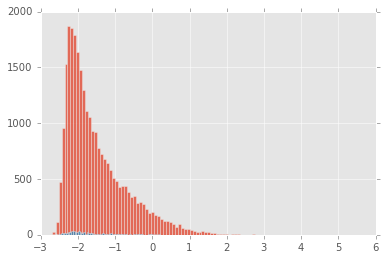

In [138]:
plt.hist(TajimaD.dropna(),bins=100,alpha=0.8)
plt.hist(TD_PH,bins=100,alpha=0.8)